In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

In [2]:
#Save path to data set in a variable
data_file = "city_data.csv"
data_file2 = "ride_data.csv"

In [3]:
#Use pandas to read the data
#print(data_file)
#data_file_pd = pd.read_json(data_file)
# pd_file = pd.read_csv(data_file)
# pd_file.head()

pd_file = pd.read_csv(data_file)
pd_file.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
pd_file2 = pd.read_csv(data_file2)
pd_file2.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
#Merge the files together on city, which is the common field between the two.
# Merge our two data frames together
combined_pyber_data = pd.merge(pd_file, pd_file2 , how="left", on=["city","city"])
combined_pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [7]:
#pwd

In [8]:
#Create a dataframe that groups by city.
citygroup = pd.DataFrame(combined_pyber_data.groupby(["city"]).count())
citygroup.head()


,driver_count,type,date,fare,ride_id
city,,,,,
Alvarezhaven,31,31,31,31,31
Alyssaberg,26,26,26,26,26
Anitamouth,9,9,9,9,9
Antoniomouth,22,22,22,22,22
Aprilchester,19,19,19,19,19


In [9]:
avgfare = round(combined_pyber_data.groupby(["city"]).mean()["fare"],2)
avgfare.head()

city
Alvarezhaven    23.93
Alyssaberg      20.61
Anitamouth      37.32
Antoniomouth    23.62
Aprilchester    21.98
Name: fare, dtype: float64

In [10]:
totalrides = combined_pyber_data.groupby(["city"]).count()["ride_id"]
totalrides.head()

city
Alvarezhaven    31
Alyssaberg      26
Anitamouth       9
Antoniomouth    22
Aprilchester    19
Name: ride_id, dtype: int64

In [11]:
# totaldrivers = combined_pyber_data.groupby("city").mean()["driver_count"]
# totalrides.head()

bycity = combined_pyber_data.groupby('city')
driver_count = bycity.mean()['driver_count']
driver_count.head()

city
Alvarezhaven    21.0
Alyssaberg      67.0
Anitamouth      16.0
Antoniomouth    21.0
Aprilchester    49.0
Name: driver_count, dtype: float64

In [12]:
cityanalysis = pd.DataFrame({"Average Fare":avgfare,
                        "Rides Per City":totalrides,
                         "Drivers per City":driver_count})
#"City Type": "type"} )
cityanalysis.head()

,Average Fare,Drivers per City,Rides Per City
city,,,
Alvarezhaven,23.93,21.0,31
Alyssaberg,20.61,67.0,26
Anitamouth,37.32,16.0,9
Antoniomouth,23.62,21.0,22
Aprilchester,21.98,49.0,19


In [13]:
#Create a new dataframe as a copy of pd_file (citydata csv) and set the index to city for merging purposes.
pd_file.reset_index()
pd_file.head()
citycsv = pd.DataFrame(pd_file)
citycsv = citycsv.reset_index()
citycsv = citycsv.set_index('city')
citycsv.head()

,index,driver_count,type
city,,,
Kelseyland,0,63,Urban
Nguyenbury,1,8,Urban
East Douglas,2,12,Urban
West Dawnfurt,3,34,Urban
Rodriguezburgh,4,52,Urban


In [14]:
cityanalysis2 = pd.DataFrame(cityanalysis)
cityanalysis2 = cityanalysis2.reset_index()
cityanalysis2 = cityanalysis2.set_index('city')
cityanalysis2.head()

,Average Fare,Drivers per City,Rides Per City
city,,,
Alvarezhaven,23.93,21.0,31
Alyssaberg,20.61,67.0,26
Anitamouth,37.32,16.0,9
Antoniomouth,23.62,21.0,22
Aprilchester,21.98,49.0,19


In [15]:
#Merge the dataframe above with the citydata csv to get the type.
getcity = pd.merge(citycsv, cityanalysis2, left_index=True,right_index=True) 
#on="city",left_index=True,right_index=True)
#drop driver count and index as they are irrelvant.
del getcity["index"]
del getcity["driver_count"]
getcity.head()

,type,Average Fare,Drivers per City,Rides Per City
city,,,,
Alvarezhaven,Urban,23.93,21.0,31
Alyssaberg,Urban,20.61,67.0,26
Anitamouth,Suburban,37.32,16.0,9
Antoniomouth,Urban,23.62,21.0,22
Aprilchester,Urban,21.98,49.0,19


In [16]:
urban_cities = combined_pyber_data[combined_pyber_data["type"] == "Urban"]
rural_cities = combined_pyber_data[combined_pyber_data["type"]=="Rural"]
suburban_cities = combined_pyber_data[combined_pyber_data["type"]=="Suburban"]

urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_count =  urban_cities.groupby(["city"]).mean()["driver_count"] 

rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_count =  rural_cities.groupby(["city"]).mean()["driver_count"] 

suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_count =  suburban_cities.groupby(["city"]).mean()["driver_count"] 


#mean driver count                                #c = coral
    #coral, skyblue 
    #counr rideid, meanfare, meandriverfare

In [26]:
#urban_cities.head()
#rural_cities.head()

ridesharingdata = pd.DataFrame({"Number of Urban Rides":urban_ride_count,
                         "Number of Urban Rides":rural_ride_count,
                         "Number of Suburban Rides":suburban_ride_count,
                          "Urban Average Fare": urban_avg_fare,
                          "Rural Average Fare":rural_avg_fare,
                           "Suburban Average Fare":suburban_avg_fare,
                            "Number of Urban Drivers": urban_driver_count,
                            "Number of Rural Drivers": urban_driver_count,
                            "Number of Suburban Drivers": suburban_driver_count} )
ridesharingdata.head()

,Number of Rural Drivers,Number of Suburban Drivers,Number of Suburban Rides,Number of Urban Drivers,Number of Urban Rides,Rural Average Fare,Suburban Average Fare,Urban Average Fare
Alvarezhaven,21.0,NaN,NaN,21.0,NaN,NaN,NaN,23.928710
Alyssaberg,67.0,NaN,NaN,67.0,NaN,NaN,NaN,20.609615
Anitamouth,NaN,16.0,9.0,NaN,NaN,NaN,37.315556,NaN
Antoniomouth,21.0,NaN,NaN,21.0,NaN,NaN,NaN,23.625000
Aprilchester,49.0,NaN,NaN,49.0,NaN,NaN,NaN,21.981579


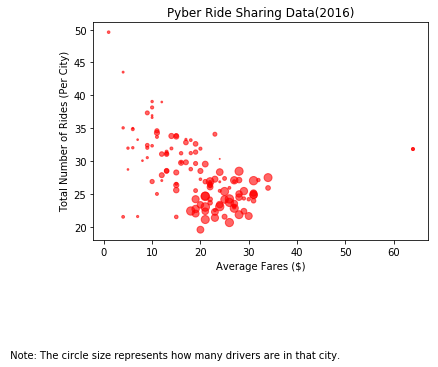

In [65]:
#This first bubble chart is without the types and it is not the final answer. 

# ridelist = getcity['Rides Per City'].tolist()
# avgfairlist = getcity['Average Fare'].tolist()
# drivercountlist = getcity['Drivers per City']
# typelist = getcity['type'].tolist()
# #s = getcity["type"]


# #plt.scatter(x=ridelist, y=avgfairlist)  #correct to use scatter plot without bubble chart.

# plt.scatter(x = ridelist, 
#             y = avgfairlist,
#            s = drivercountlist,
#            marker="o", facecolors="red",
#            alpha = 0.6)

# plt.title('Pyber Ride Sharing Data(2016)')
# plt.ylabel('Total Number of Rides (Per City)')
# plt.xlabel('Average Fares ($)')
# plt.text(-20,0, " Note: The circle size represents how many drivers are in that city.")
# #\n
# plt.show()

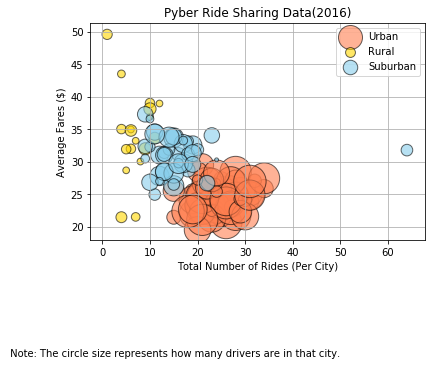

In [34]:
#Create bubble chart. Final bubble chart.

plt.scatter(x=urban_ride_count,
            y=urban_avg_fare,
           s = 15 * urban_driver_count,
           marker="o", facecolors="coral",
            #linewidths = 0,
            edgecolor = "black",
           alpha = 0.6)
plt.scatter(x=rural_ride_count,
            y=rural_avg_fare,
           s = 15 * rural_driver_count,
           marker="o", facecolors="gold",
            #linewidths = 0,
            edgecolor = "black",
           alpha = 0.6)
plt.scatter(x=suburban_ride_count,
            y=suburban_avg_fare,
           s = 15 * suburban_driver_count,
           marker="o", facecolors="skyblue",
            #linewidths = 0,
            edgecolor = "black",
           alpha = 0.6)
plt.title('Pyber Ride Sharing Data(2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fares ($)')
plt.text(-20,0, " Note: The circle size represents how many drivers are in that city.")

# legend = ["Rural", "Suburban", "Urban"]
plt.legend(["Urban","Rural", "Suburban"])
# lgnd = plt.legend(fontsize = "small", 
#             mode = "Expanded", 
#             numpoints = 1, 
#             scatterplots = 1, 
#             loc = "best", 
#             title = "City Type", 
#             labelspacing = 0.5)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[1]._sizes = [30]
# lgnd.legendHandles[2]._sizes = [30]

plt.grid()
plt.show()

#You must include a written description of three observable trends based on the data.
In the bubble chart above, I can see that in urban cities, the average fares are lower despite having the highest number of rides. By contrast, rural has less number of rides but higher average fares. Suburban is in the middle. It may be beneficial for the ride sharing company to target urban and suburban areas since urban areas have the highest number of rides and suburban has higher average fares. 
In the pie charts below, urban dominates the two other city types in the total fares, total rides and total rides. This makes sense because not everyone who lives in urban areas has a car and people who live in urban areas typically depend on public transportation. Suburban is second in all three pie charts. 

# Total Fares by City Type

In [66]:
#% of Total Fares 
# demogroup = combined_pyber_data.groupby(["city","type"])
# demogroup.size()
typegroup = combined_pyber_data.groupby(["type","city"])
#typegroup.head()


In [67]:

# perfare= combined_pyber_data.groupby(["city", "type"]).size()
# perfare #ridespertype
# #create into a dataframe
# farespertype = pd.DataFrame(perfare)
# farespertype

# #perfaretype = combined_pyber_data.groupby(["type"]).size()


# perfaretype = perfare.groupby(["type"]).size()
# perfaretype


#typefares = pd.DataFrame(farespertype.groupby(["type"]).count())
#typefares.columns = ["NumberFares"]
#typefares


In [68]:
#ridestype = pd.DataFrame(combined_pyber_data.groupby(["city","type"]).sum())

ridestype = pd.DataFrame(combined_pyber_data.groupby(["type"]).sum()["fare"])
ridestype.columns = ["NumberFares"]
ridestype
#ridestype.loc['Port James']

,NumberFares
type,
Rural,4255.09
Suburban,20335.69
Urban,40078.34


In [69]:
# by_type = combined_pyber_data.groupby('type')['type', 'fare', 'ride_id', 'driver_count']
# by_type.head()
# #total fare by city
# fare_sum = by_type.sum()['fare']
# fare_sum

In [70]:
#Total Number of Fares
fares_count = ridestype["NumberFares"].sum()
fares_count

64669.119999999966

In [71]:
ruralfares = round(ridestype["NumberFares"].loc["Rural"],2)
#ruralfares = typefares["NumberFares"].loc["Rural"]
print(ruralfares)
#print(ruralrides)

4255.09


In [72]:
subfares = round(ridestype["NumberFares"].loc["Suburban"],2)
#subfares = typefares["NumberFares"].loc["Suburban"]
print(subfares)
#print(subrides)

20335.69


In [73]:
urbanfares = round(ridestype["NumberFares"].loc["Urban"],2)
#urbanfares = typefares["NumberFares"].loc["Urban"]
print(urbanfares)
#print(urbanrides)

40078.34


In [74]:
ruralpercent = round(ruralfares / fares_count, 2) * 100
ruralpercent

7.000000000000001

In [75]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [ruralfares, subfares, urbanfares]

# The colors of each section of the pie chart
colors = ["yellowgreen", "red", "lightcoral"]
#, "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.2)

#Define colors for each type to be used in pie plots. Use the hex code. 
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
city_color = {'Rural': color_scheme['Gold'], 'Suburban': color_scheme['Light Sky Blue'], 'Urban': color_scheme['Light Coral']}


Text(0.5,1,'% of Total Fares by City Type')

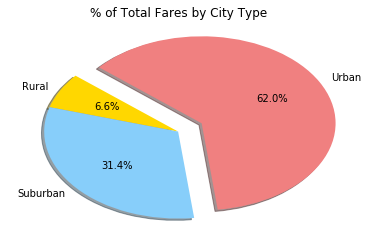

In [76]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart

#colors and exploe the same for all pie charts, reference here
colors = [city_color[n] for n in labels]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Fares by City Type')

In [77]:
# Tells matplotlib that we want a pie chart with equal axes
#plt.axis("equal")

In [78]:
# Prints our pie chart to the screen
plt.show()

# Total Rides by City Type

In [79]:
#Total Rides by City Type
ridestype = pd.DataFrame(combined_pyber_data.groupby(["city","type"]).sum())

ridestype = pd.DataFrame(combined_pyber_data.groupby(["type"]).count()["ride_id"])
ridestype.columns = ["NumberRides"]
ridestype

,NumberRides
type,
Rural,125
Suburban,657
Urban,1625


In [80]:
riders_count = ridestype["NumberRides"].sum()
riders_count

2407

In [81]:
ruralrides = ridestype["NumberRides"].loc["Rural"]
print(ruralrides)
subrides = ridestype["NumberRides"].loc["Suburban"]
print(subrides)
urbanrides = ridestype["NumberRides"].loc["Urban"]
print(urbanrides)

125
657
1625


In [82]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [ruralrides, subrides, urbanrides]

# The colors of each section of the pie chart
#colors = ["yellowgreen", "red", "lightcoral"]
#, "lightskyblue"]

colors = [city_color[n] for n in labels]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.2)

Text(0.5,1,'% of Total Rides by City Type')

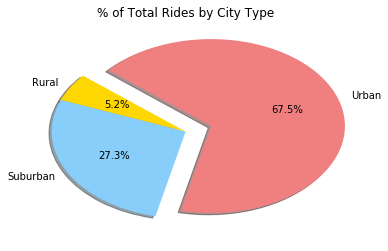

In [83]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Rides by City Type')

# Total Drivers by City Type

In [158]:
#drivers = combined_pyber_data.groupby(["city","type"]).sum()["driver_count"] / combined_pyber_data.sum["driver_count"]
driversorig = pd.DataFrame(combined_pyber_data.groupby(["city","type", "driver_count"]).sum())

driversorig.reset_index(inplace=True)
driversorig
driversorig = pd.DataFrame(drivers.groupby("type").sum())
drivers = pd.DataFrame(driversorig)
# drivers = combined_pyber_data.groupby(["city","type"]).sum()
# drivers.reset_index(inplace = True)
# drivers.groupby("type").sum()
#drivers
#del drivers["fare"]
#del drivers["ride_id"]
drivers


,driver_count
type,
Rural,104
Suburban,638
Urban,2607


In [159]:
urbandrivers = drivers.loc['Urban']
urbandrivers 

driver_count    2607
Name: Urban, dtype: int64

In [160]:
subdrivers = drivers.loc['Suburban']
subdrivers

driver_count    638
Name: Suburban, dtype: int64

In [161]:
ruraldrivers = drivers.loc['Rural']
ruraldrivers

driver_count    104
Name: Rural, dtype: int64

In [165]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [ruraldrivers, subdrivers, urbandrivers]

# The colors of each section of the pie chart
colors = ["yellowgreen", "red", "lightcoral"]
#, "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

colors = [city_color[n] for n in labels]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.2)

Text(0.5,1,'% of Total Drivers by City Type')

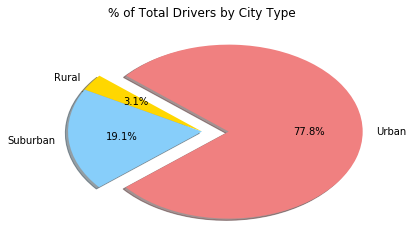

In [166]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('% of Total Drivers by City Type')

In [91]:
# countfare = demogroup.count()["fare"]
# countfare

In [92]:
#type(pd_file.groupby(["city","type"]))

In [43]:
#list(pd_file.groupby(["type"]))

In [44]:
# for group_key, group_value in pd_file.groupby('type'):
#     print(group_key)
#     print(group_value)

In [45]:
# for group_key, group_value in typegroup:
#     print(group_key)
#     print(group_value)